# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Information on program & Observations
This code using a logging system.  
The log file is in 'output' directory, file name follows the convention WeatherPy_YYYY-MM-DD.log
I added country code to the weather api call in hopes it would reduce errors.


=================  Observations  ========================
* city densities drop off towards either end of latitude (90/-90) and colder temperatures
* City densities do not seem to be significantly affected by Cloudiness or Humidity 
* There appears to be more density of cities in the northern hemisphere.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import logging
from datetime import datetime


# import pprint as pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output/cities.csv"

logdate = datetime.today().strftime('%Y%m%d_%I%M%S')
LOGOUTPUTFILE = "output/WeatherPy_" + logdate + ".log"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

DEBUG = False
USEAPI = True


In [2]:
#- Setup logging, set start time
logging.basicConfig(filename=LOGOUTPUTFILE, filemode='w', level=logging.INFO, format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %I:%M:%S %p')
logging.info("==================================================")
logging.info("==================================================")
logging.info(f'Program start at {datetime.today()}')
logging.info("==================================================")
logging.info("")
logging.info("")

In [3]:
print("==================================================")
print("==================================================")
print(f"Program start at {datetime.today().strftime('%Y%m%d_%I:%M:%S %p')}")
print("==================================================")
print("")
print("")

Program start at 20190823_09:57:16 PM





## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = {}

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    cityrsp = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    ############## an improvement may be to get the country code also
# >>> from citipy import citipy
# >>> city = citipy.nearest_city(22.99, 120.21)
# >>> city
# <citipy.City instance at 0x1069b6518>
# >>>
# >>> city.city_name     # Tainan, my home town
# 'tainan'
# >>>
# >>> city.country_code
# 'tw'                  # And the country is surely Taiwan
    city = cityrsp.city_name
    country = cityrsp.country_code

    # If the city is unique, then add it to a our cities list
    if city not in cities.keys():
        cities[city] = country

# Print the city count to confirm sufficient count
numbrCities = len(cities)

logging.info(f'Number of citys from call to citypy: {numbrCities}')
logging.info(f'')

print(f'Number of citys from call to citypy: {numbrCities}')


Number of citys from call to citypy: 631


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# api.openweathermap.org/data/2.5/weather?q={city name}
# api.openweathermap.org/data/2.5/weather?unitsImperial&APPID={api_key}q={city name}



if USEAPI:
    
    cityWeather = []
    cnt = 0
    errCnt = 0

    
    for city, country in cities.items():
        

        cnt +=1
        logging.info(f'Count is {cnt} city is {city}, {country}')
        #logging.info(f'')
        
        print(f'Count is {cnt} city is {city}, {country}')
        
        url = f'http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={api_key}&q={city},{country}'
        
        logging.info(f'{url}')
        #logging.info(f'')
        
        print(f'{url}')
        
        response = requests.get(url).json()
        if DEBUG:
            print(response)
            logging.info(response)
            logging.info('')

        # Check for city not found error
        if int(response['cod']) == 404:
            print(f'Skipping city {city}, {country}.  City not found')
            logging.info(f'Skipping city {city}, {country}.  City not found')
            logging.info('')
            
            errCnt +=1            

        else:
            # city
            cloudiness = response['clouds']['all']
            country = response['sys']['country']
            humidity = response['main']['humidity']
            lat = response['coord']['lat']
            lng = response['coord']['lon']
            maxtemp = response['main']['temp_max']
            windspeed = response['wind']['speed']

            cityWeather.append({
                'City': city,
                'Cloudiness': cloudiness,
                'Country': country,
                'Humidity': humidity,
                'Lat': lat,
                'Lng': lng,
                'MaxTemp': maxtemp,
                'WindSpeed': windspeed

            })



        time.sleep(1)

    
    
    # Spit out counts of errors, total records... 
    logging.info('----------------------------------------')
    logging.info(f'Number of Cities: {numbrCities}, Total calls: {cnt}, Number not found/errored {errCnt}') 
    logging.info(f'finished calling weather api at {datetime.today()}')
    logging.info("")
    
    print(f'Number of Cities: {numbrCities}, Total calls: {cnt}, Number not found/errored {errCnt}') 
    print(f'finished calling weather api at {datetime.today()}')


Count is 1 city is ambanja, mg
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=ambanja,mg
Count is 2 city is diffa, ne
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=diffa,ne
Count is 3 city is saint george, us
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=saint george,us
Count is 4 city is ust-kamchatsk, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=ust-kamchatsk,ru
Skipping city ust-kamchatsk, ru.  City not found
Count is 5 city is kodiak, us
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=kodiak,us
Count is 6 city is barrow, us
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=barrow,us
Count is 7 city is manoel urbano, br
http://api.openweathermap.org/

Count is 54 city is bredasdorp, za
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=bredasdorp,za
Count is 55 city is asau, tv
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=asau,tv
Skipping city asau, tv.  City not found
Count is 56 city is sambava, mg
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=sambava,mg
Count is 57 city is colares, pt
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=colares,pt
Count is 58 city is cuncolim, in
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=cuncolim,in
Count is 59 city is mobaye, cf
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=mobaye,cf
Count is 60 city is lufilufi, ws
http://api.openweathermap.org/data/2.5/weather?unit

Count is 108 city is dudinka, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=dudinka,ru
Count is 109 city is verkhnevilyuysk, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=verkhnevilyuysk,ru
Count is 110 city is vieux-habitants, gp
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=vieux-habitants,gp
Count is 111 city is taolanaro, mg
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=taolanaro,mg
Skipping city taolanaro, mg.  City not found
Count is 112 city is kidal, ml
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=kidal,ml
Count is 113 city is grenada, us
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=grenada,us
Count is 114 city is castro, cl
http://ap

Count is 159 city is mapimi, mx
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=mapimi,mx
Count is 160 city is urumqi, cn
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=urumqi,cn
Skipping city urumqi, cn.  City not found
Count is 161 city is torbay, ca
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=torbay,ca
Count is 162 city is tuktoyaktuk, ca
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=tuktoyaktuk,ca
Count is 163 city is tighina, md
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=tighina,md
Skipping city tighina, md.  City not found
Count is 164 city is lebu, cl
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=lebu,cl
Count is 165 city is arman, ru
http:/

Count is 212 city is buraydah, sa
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=buraydah,sa
Count is 213 city is sinnamary, gf
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=sinnamary,gf
Count is 214 city is mumbwa, zm
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=mumbwa,zm
Count is 215 city is alofi, nu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=alofi,nu
Count is 216 city is tiksi, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=tiksi,ru
Count is 217 city is leningradskiy, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=leningradskiy,ru
Count is 218 city is oranjemund, na
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b

Count is 266 city is bilokurakyne, ua
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=bilokurakyne,ua
Count is 267 city is bayangol, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=bayangol,ru
Count is 268 city is kranjska gora, si
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=kranjska gora,si
Count is 269 city is praia, cv
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=praia,cv
Count is 270 city is hovd, mn
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=hovd,mn
Count is 271 city is codrington, ag
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=codrington,ag
Skipping city codrington, ag.  City not found
Count is 272 city is mar del plata, ar
http://api.op

Count is 319 city is kondinskoye, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=kondinskoye,ru
Count is 320 city is firminy, fr
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=firminy,fr
Count is 321 city is szczecinek, pl
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=szczecinek,pl
Count is 322 city is puerto madryn, ar
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=puerto madryn,ar
Count is 323 city is statesboro, us
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=statesboro,us
Count is 324 city is antalaha, mg
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=antalaha,mg
Count is 325 city is beihai, cn
http://api.openweathermap.org/data/2.5/weather?units

Count is 373 city is sur, om
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=sur,om
Count is 374 city is xichang, cn
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=xichang,cn
Count is 375 city is broken hill, au
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=broken hill,au
Count is 376 city is macapa, br
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=macapa,br
Count is 377 city is bilibino, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=bilibino,ru
Count is 378 city is lahij, ye
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=lahij,ye
Count is 379 city is coahuayana, mx
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74

Count is 427 city is east wenatchee bench, us
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=east wenatchee bench,us
Count is 428 city is el jicaro, ni
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=el jicaro,ni
Count is 429 city is mananjary, mg
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=mananjary,mg
Count is 430 city is kamenka, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=kamenka,ru
Count is 431 city is kieta, pg
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=kieta,pg
Count is 432 city is am timan, td
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=am timan,td
Count is 433 city is bengkulu, id
http://api.openweathermap.org/data/2.5/weather?units

Count is 481 city is flin flon, ca
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=flin flon,ca
Count is 482 city is huangmei, cn
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=huangmei,cn
Count is 483 city is srbac, ba
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=srbac,ba
Count is 484 city is ninh binh, vn
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=ninh binh,vn
Count is 485 city is kudahuvadhoo, mv
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=kudahuvadhoo,mv
Count is 486 city is eyl, so
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=eyl,so
Count is 487 city is adrar, dz
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b79

Count is 535 city is belis, ro
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=belis,ro
Count is 536 city is caluquembe, ao
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=caluquembe,ao
Count is 537 city is cherdyn, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=cherdyn,ru
Count is 538 city is bandarbeyla, so
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=bandarbeyla,so
Count is 539 city is abadan, ir
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=abadan,ir
Count is 540 city is phangnga, th
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=phangnga,th
Count is 541 city is ust-barguzin, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6

Count is 589 city is tungkang, tw
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=tungkang,tw
Skipping city tungkang, tw.  City not found
Count is 590 city is bagdarin, ru
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=bagdarin,ru
Count is 591 city is launceston, au
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=launceston,au
Count is 592 city is nao-me-toque, br
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=nao-me-toque,br
Skipping city nao-me-toque, br.  City not found
Count is 593 city is kloulklubed, pw
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=kloulklubed,pw
Count is 594 city is lucapon, ph
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=f6037b60b7920e9d74f375258d824e09&q=lucapon,p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
if USEAPI:
    cityWeatherDF = pd.DataFrame(cityWeather)
    cityWeatherDF.to_csv(output_data_file, index=False, encoding='utf-8')

In [7]:
if USEAPI == False: # we are not calling weather api, 
    # Read in csv and load dataframe
    cityWeatherDF = pd.read_csv(output_data_file)
    cityWeatherDF

In [8]:
logging.info("")
logging.info("====== City Weather Dataframe head(10)")
logging.info(cityWeatherDF)
logging.info("")

print("====== City Weather Dataframe head(10)")
print(cityWeatherDF)


====== City Weather Dataframe head(10)
                City  Cloudiness Country  Humidity    Lat     Lng  MaxTemp  \
0            ambanja          72      MG        83 -13.68   48.45    76.57   
1              diffa          46      NE        62  13.32   12.61    81.15   
2       saint george           1      US       100  38.54  -90.31    75.20   
3             kodiak           1      US        83  39.95  -94.76    73.40   
4             barrow           1      US        82  39.51  -90.40    72.00   
..               ...         ...     ...       ...    ...     ...      ...   
549  aleksandrov gay          16      RU        75  50.14   48.57    69.73   
550        namatanai         100      PG        84  -3.66  152.44    79.17   
551          batagay          99      RU        42  67.65  134.64    71.48   
552         cabedelo          20      BR        94  -6.97  -34.84    71.60   
553            minot           1      US        83  48.23 -101.30    72.00   

     WindSpeed  
0      

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

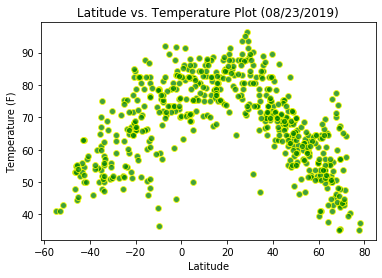

<Figure size 432x288 with 0 Axes>

In [9]:
# X will be lat, Y will be Temp
x_axis = cityWeatherDF['Lat']
y_axis = cityWeatherDF['MaxTemp']




# Scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="yellow", alpha=0.75)

sDate = pd.Timestamp("today").strftime("%m/%d/%Y")

# Titles/Labels
plt.title(f'Latitude vs. Temperature Plot ({sDate})')
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()
plt.savefig('output/LatVsTemp.png')

#### Latitude vs. Humidity Plot

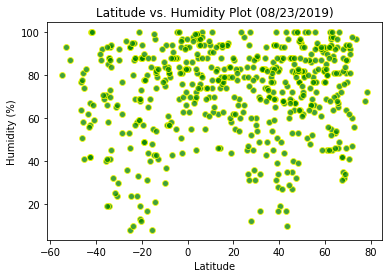

<Figure size 432x288 with 0 Axes>

In [10]:
# X will be lat, Y will be Humidity
x_axis = cityWeatherDF['Lat']
y_axis = cityWeatherDF['Humidity']




# Scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="yellow", alpha=0.75)

sDate = pd.Timestamp("today").strftime("%m/%d/%Y")

# Titles/Labels
plt.title(f'Latitude vs. Humidity Plot ({sDate})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig('output/LatVsHumidity.png')

#### Latitude vs. Cloudiness Plot

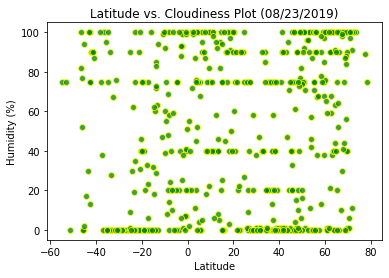

<Figure size 432x288 with 0 Axes>

In [11]:
# X will be lat, Y will be Humidity
x_axis = cityWeatherDF['Lat']
y_axis = cityWeatherDF['Cloudiness']




# Scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="yellow", alpha=0.75)

sDate = pd.Timestamp("today").strftime("%m/%d/%Y")

# Titles/Labels
plt.title(f'Latitude vs. Cloudiness Plot ({sDate})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig('output/LatVsClouds.png')

#### Latitude vs. Wind Speed Plot

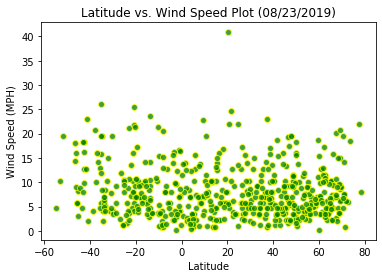

<Figure size 432x288 with 0 Axes>

In [12]:
# X will be lat, Y will be Humidity
x_axis = cityWeatherDF['Lat']
y_axis = cityWeatherDF['WindSpeed']




# Scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="yellow", alpha=0.75)

sDate = pd.Timestamp("today").strftime("%m/%d/%Y")

# Titles/Labels
plt.title(f'Latitude vs. Wind Speed Plot ({sDate})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.show()
plt.savefig('output/LatVsWindSpd.png')

In [13]:
logging.info("")
logging.info("")
logging.info("==================================================")
logging.info("==================================================")
logging.info(f'Program END at {datetime.today()}')
logging.info("==================================================")
logging.info("")
logging.info("")



print("==================================================")
print("==================================================")
print(f'Program END at {datetime.today()}')
print("==================================================")


Program END at 2019-08-23 22:10:05.738209
